## **Tugas Praktikum** 

 **1. Import library dan mempersiapkan data**

In [2]:
# import package
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

data = pd.read_csv("./data/dataset_3.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**2. Membuang data yang tidak diperlukan**

In [8]:
# Membuang data region
data = data.drop(['region'], axis=1)
data.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


**3. Melakukan data preprocessing**

In [12]:
# Melakukan cek jika terdapat data yang null
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 62.8+ KB


In [13]:
# Mendeskripsikan data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


**4. Melakukan encoding data yang termasuk kategori**

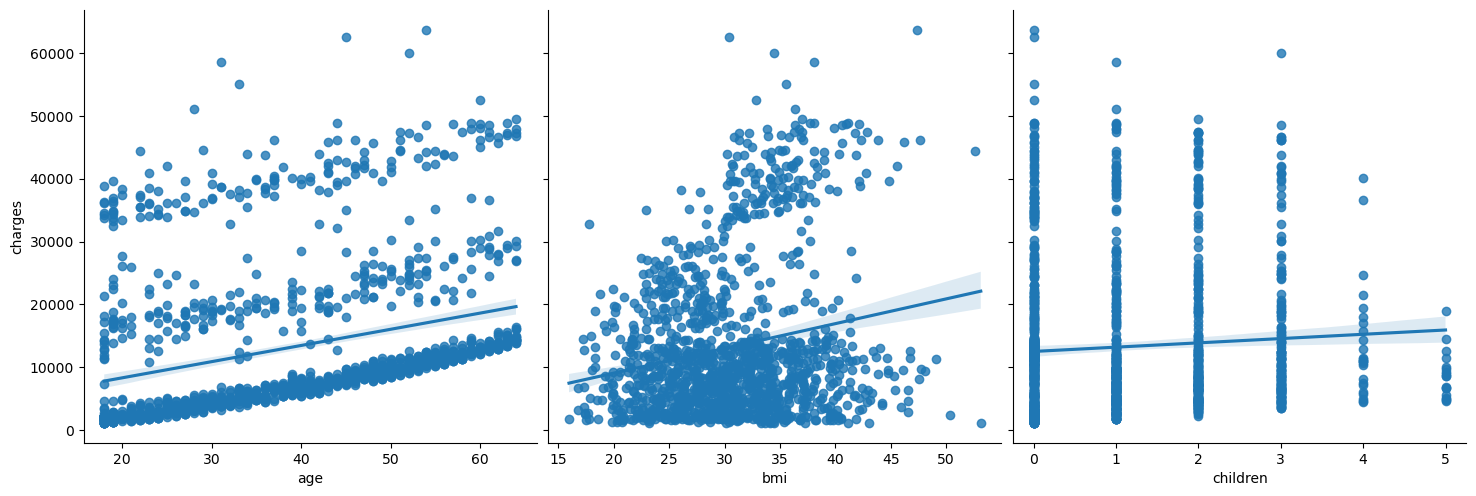

In [17]:
# Mengubah data categorical
le = LabelEncoder()
data['sex'] = le.fit_transform(data['sex'])
data['smoker'] = le.fit_transform(data['smoker'])

# Melakukan visualisasi data menggunakan pair plot
sns.pairplot(data, x_vars=['age', 'bmi', 'children'], y_vars='charges', height=5, aspect=1, kind='reg')

**5. Melakukan koofisien korelasi**

<Axes: >

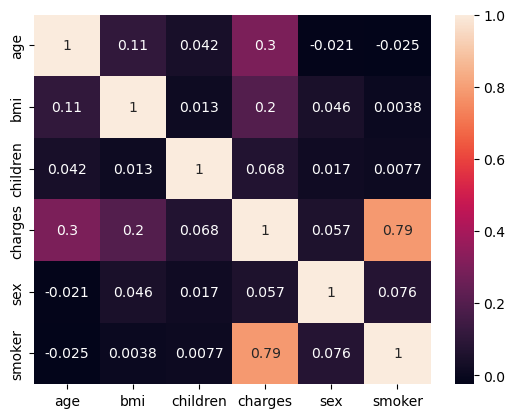

In [20]:
corr = data[['age', 'bmi', 'children', 'charges', 'sex', 'smoker']].corr()
sns.heatmap(corr, annot=True)

**6. Melakukan split data dan feature scaling**

In [24]:
# Split data x dan y lalu memisahkan data train dan test
x = data[['age', 'sex', 'bmi', 'children', 'smoker']]
y = data['charges']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

**7. Melakukan data modeling**

In [27]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(x_train, y_train)

# Predict test data
y_pred = svr.predict(x_test)

**8. Evaluasi Model & Visualisasi**

In [28]:
# Evaluasi Model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error (MSE) = ', mse)
print('Mean Absolute Error (MAE) = ', mae)
print('R-Squared (R2) = ', r2)

Mean Squared Error (MSE) =  174844168.0728127
Mean Absolute Error (MAE) =  8563.845604154736
R-Squared (R2) =  -0.0987507664890721


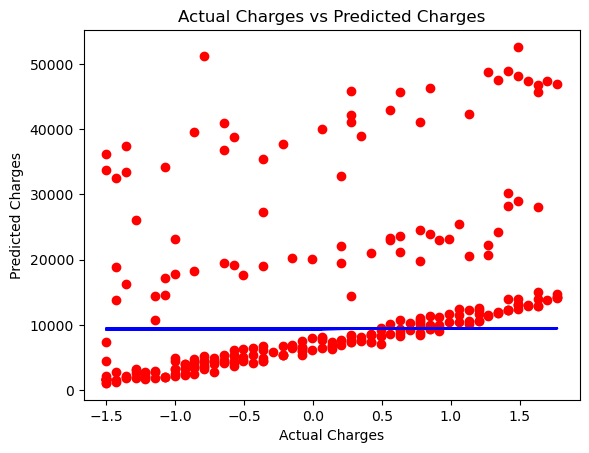

In [29]:
# Visualisasi Model
plt.scatter(x_test[:, 0], y_test, color='red')
plt.plot(x_test[:, 0], y_pred, color='blue')
plt.title('Actual Charges vs Predicted Charges')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.show()